In [11]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

In [12]:
file2 = open("20NodeRandomLocalData.txt")
file3 = open("20NodeRandomGraphs.txt")

In [13]:
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list

In [14]:
g_data = np.loadtxt(file2).reshape(55,20,4)
mat_list = np.loadtxt(file3).reshape(55,20,20)
g_list = mats_to_graphs(mat_list)

In [20]:
len(g_list)

55

# Analyzing distribution of diff even % graphs

In [15]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes

In [68]:
keys = [i/10 for i in range(11)]
data = {}
for key in keys:
    data[key] = []

In [69]:
len([[1],[1,2]])

2

In [70]:
for g_idx in range(len(g_list)):
    g = g_list[g_idx]
    key = even_percent(g)
    betas = []
    gammas = []
    for i in range(20):
        gammas.append(g_data[g_idx][i][0]%1)# [,g_data[g_idx][i][0]%0.5 ]
        betas.append(g_data[g_idx][i][1]%0.5)
    old = data[key]
    if len(old) == 0:
        data[key] = [betas, gammas]
    
    else:
        #print(len(old))
        #new_old = [[],[]]
        for k in range(20):
            old[0].append(betas[k])
            old[1].append(gammas[k])
        data[key] = old

In [72]:
len(data[1.0][1])

100

In [76]:
from scipy.stats import gaussian_kde

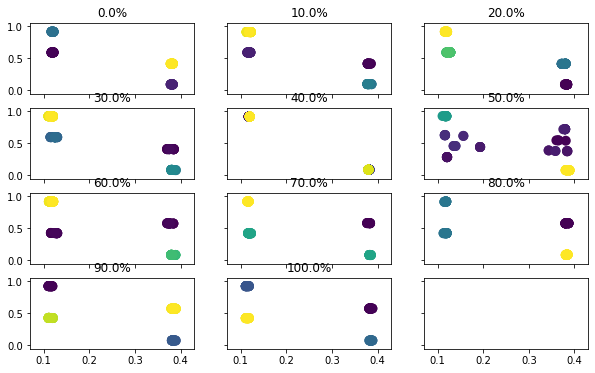

In [101]:
fig, ax = plt.subplots(4,3, sharex=True, sharey = True, figsize = (10,6))
for i in range(4):
    for j in range(3):
        key = (3*i +j)/10
        if key<=1:
            
            x,y = data[key]
            xy = np.vstack([x,y])
            z = gaussian_kde(xy)(xy)
            
            ##Densest points plotted last 
            idx = z.argsort()
            newx = []
            newy = []
            newz = []
            for k in idx:
                newx.append(x[k])
                newy.append(y[k])
                newz.append(z[k])

            # fig, ax = plt.subplots()
            ax[i,j].scatter(newx, newy, c=newz, s=100, edgecolor='')
            ax[i,j].title.set_text( str(key*100)+ "%")

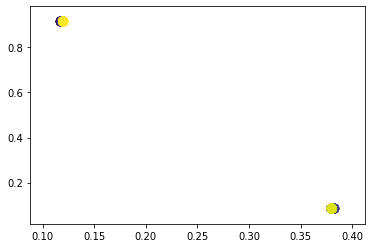

In [99]:
x, y = data[0.4]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
newx = []
newy = []
newz = []
for i in idx:
    newx.append(x[i])
    newy.append(y[i])
    newz.append(z[i])
    
# fig, ax = plt.subplots()
plt.scatter(newx, newy, c=newz, s=100, edgecolor='')

In [97]:
idx

array([15, 30, 26, 22, 35, 25, 21, 31, 24, 98, 80, 97, 91, 81, 83, 85, 82,
       93, 36, 38, 20, 89, 27, 39, 29, 33, 23, 37, 34, 28, 86, 84, 99, 95,
       32, 96, 92, 88, 87, 90, 94, 74, 12, 13, 44, 46, 18, 51, 67, 76, 40,
       68, 45, 50, 43, 57, 79, 71, 58, 47, 72, 63, 48, 53, 14,  8,  9, 10,
       16,  6,  5, 73, 64, 60, 69, 70, 75, 66, 78, 65, 77, 59, 55, 61, 54,
       49, 62, 19, 56, 41, 42,  0, 52,  7,  2,  3,  4, 17,  1, 11])

In [96]:
z

array([557.90434093, 558.74976736, 558.36810428, 558.44015311,
       558.49892403, 537.50381232, 537.48172938, 558.27875038,
       537.3691285 , 537.43319241, 537.4342295 , 558.8168437 ,
       477.48202735, 510.13111825, 536.9215914 , 144.95099188,
       537.47113722, 558.64057258, 531.20685235, 555.60840763,
       224.37473223, 152.07835375, 151.90266868, 227.18516637,
       152.1282102 , 152.06680597, 150.94933988, 226.70972325,
       227.66003469, 226.99521375, 149.49964713, 152.12735948,
       228.34880367, 227.08288549, 227.38763553, 151.95566832,
       217.12857977, 227.36399929, 219.64425438, 226.97260867,
       532.14401124, 555.7987092 , 557.23514472, 532.81362873,
       523.53588317, 532.68211193, 530.84173016, 534.29677158,
       535.45939045, 555.49185132, 532.73991755, 531.30410966,
       557.96819441, 536.40788506, 555.41034406, 553.50139305,
       555.66339713, 533.07268237, 533.56718501, 553.49802344,
       550.64478924, 554.10324138, 555.59904729, 535.07

In [91]:
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax

TypeError: only integer scalar arrays can be converted to a scalar index

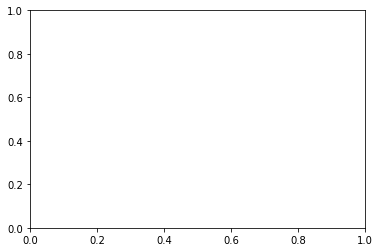

In [93]:
density_scatter( x , y )

In [7]:
g_list = mats_to_graphs(mat_list)

In [8]:
max_energies

[20.284749105370768,
 20.502635955801225,
 18.066398420918414,
 17.86002664365252,
 20.864235941178443,
 20.858653070476944,
 23.980917630040672,
 23.838427673621815,
 22.221382432427987,
 22.06849600891617,
 26.780676084021273,
 26.679933259533694,
 23.457681076195165,
 23.25716682150475,
 22.91554565357199,
 23.079868335123706,
 21.81286201725008,
 21.96574473687494,
 26.793042762094295,
 27.183336848383497,
 27.66213945620647,
 27.845212736429364,
 20.334773176913686,
 20.573426826891534,
 20.406697224191806,
 17.85286348497528,
 18.022779955152135,
 17.56897217599276,
 23.338656210439737,
 22.854887436815865,
 23.443608667223767,
 23.10158243276543,
 23.067116935873962,
 23.05784920134478,
 21.160546969459688,
 21.047016182737273,
 21.119511380242272,
 23.570360967601996,
 23.33135849133972,
 23.982326041550806,
 22.214167951626468,
 22.22565712028168,
 22.149960921417307,
 26.879145535277534,
 26.640141111375648,
 26.28063042367684,
 22.06250407244687,
 21.91218840745617,
 22.0161

In [10]:
step = 20
gamma = np.linspace(0, 1, num = step)
beta = np.linspace(0, 0.5, num = step)
data_1 = np.zeros((step, step))
data_2 = np.zeros((step, step))

In [11]:
def get_edge_energy_contribution(graph, edge, gamma, beta):
    sim = qtensor.QtreeSimulator()
    composer = qtensor.DefaultQAOAComposer(graph, gamma=gamma, beta=beta)
    composer.energy_expectation_lightcone(edge)
    return (1-np.real(sim.simulate_batch(composer.circuit)[0]))/2

In [ ]:
%%capture
for i in range(len(gamma)):
    print('#####')
    print(i)
    for j in range(len(beta)):
        print(j)
        s=0
        t = 0
        for sub_idx in range(len(g_list)):
            sub = g_list[sub_idx]
            e = QAOA_energy(sub, gamma = [gamma[i]], beta= [beta[j]])
            best_en = max_energies[sub_idx]
            print(e)
            
            s+= e/best_en
            
            if s>0.99:
                t+=1
        data_1[i][j] = s/len(g_list)
        data_2[i][j] = t

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))
#title = "Energy landscape of subgraph indexed 40"
#plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5, 1.05])


y_ticks = [round(gamma[len(gamma)-i-1],2) for i in range(len(gamma))]
x_ticks = [round(beta[i],2) for i in range(len(beta))]


sns.heatmap(data_1, ax = ax, yticklabels = [], xticklabels = [])#, cbar_kws={label : "Averaage Approximation Ratio"})
cbar = ax.collections[0].colorbar
cbar.set_label("Average Approximation Ratio")
plt.ylabel(r"$\frac{\gamma}{2\pi}$")
plt.xlabel(r"$\frac{\beta}{2\pi}$")
plt.show()
#fig.savefig("fig_graphUniversality_July26.png", dpi = 100)
# ax.set_yticks(y_ticks)
# ax.set_xticks(x_ticks)